# Word statistics on open source in environmental sustainability

## Ideas and ToDo
Compare with: https://blogs.reading.ac.uk/weather-and-climate-at-reading/2021/whats-that-data-why-and-how-the-geoscientific-community-is-forging-metadata-standards/
https://github.com/sadielbartholomew/cf-standard-names-linguistics
https://sadielbartholomew.github.io/cf-standard-names-linguistics/

In [1]:
!pip install nltk pandas yake multi_rake wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904033 sha256=f74226f1f7893878e76b82783d819c22b4f97d5293e2ebaaf90c8e0cd67dd4ea
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1974, 29)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,project_url,html_url
0,73419,Py-ART,A data model driven interactive toolkit for wo...,https://github.com/arm-doe/pyart,2024-06-12 10:01:09.870000+00:00,"{'id': 5086348, 'uuid': '6248645', 'full_name'...","{'login': 'ARM-DOE', 'name': 'ARM User Facilit...","[{'id': 5413461, 'name': 'py-arm-pyart', 'ecos...","{'full_name': 'ARM-DOE/pyart', 'default_branch...","{'full_name': 'ARM-DOE/pyart', 'html_url': 'ht...",None,"[closember, data-visualization, hacktoberfest,...","[{'ecosystem': 'pypi', 'filepath': 'requiremen...",21.013420,2023-09-18 13:18:27.404000+00:00,2024-06-12 10:01:09.901000+00:00,https://github.com/ARM-DOE.png,Python,Atmosphere,Meteorological Observation and Forecast,27001,.. -*- mode: rst -*-\nThe Python ARM Radar Too...,[],[http://doi.org/10.5334/jors.119],{},{},0,https://ost.ecosyste.ms/api/v1/projects/73419,https://ost.ecosyste.ms/projects/73419
1,193296,PARETO,An Optimization Framework for Produced Water M...,https://github.com/project-pareto/project-pareto,2024-06-12 09:30:42.493000+00:00,"{'id': 37539257, 'uuid': '375089252', 'full_na...","{'login': 'project-pareto', 'name': 'project-p...",[],"{'full_name': 'project-pareto/project-pareto',...","{'full_name': 'project-pareto/project-pareto',...","{'total': {'ForkEvent': 23, 'CreateEvent': 26,...",[pse],"[{'ecosystem': 'actions', 'filepath': '.github...",7.404279,2024-05-24 00:14:46.717000+00:00,2024-06-12 09:30:42.496000+00:00,https://github.com/project-pareto.png,Python,Natural Resources,Water Supply,0,<!-- ![pareto logo](docs/img/logo-print-hd.jpg...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/193296,https://ost.ecosyste.ms/projects/193296
2,183659,DeepSensor,A Python package for tackling diverse environm...,https://github.com/alan-turing-institute/deeps...,2024-06-12 09:30:31.758000+00:00,"{'id': 173973854, 'uuid': '641387112', 'full_n...","{'login': 'alan-turing-institute', 'name': 'Th...",[],{'full_name': 'alan-turing-institute/deepsenso...,{'full_name': 'alan-turing-institute/deepsenso...,"{'total': {'CreateEvent': 5, 'IssuesEvent': 14...",[],"[{'ecosystem': 'actions', 'filepath': '.github...",7.138867,2024-02-03 00:11:10.275000+00:00,2024-06-12 09:30:31.769000+00:00,https://github.com/alan-turing-institute.png,Python,Climate Change,Climate Downscaling,0,[//]: # (![]&#40;figs/DeepSensorLogo.png&#41;)...,[],[https://doi.org/10.1017/eds.2023.22],{},{},0,https://ost.ecosyste.ms/api/v1/projects/183659,https://ost.ecosyste.ms/projects/183659
3,190601,Climakitae,Enable a transition from climate vulnerability...,https://github.com/cal-adapt/climakitae,2024-06-12 09:30:31.675000+00:00,"{'id': 37842941, 'uuid': '426055437', 'full_na...","{'login': 'cal-adapt', 'name': 'Cal-Adapt', 'u...",[],"{'full_name': 'cal-adapt/climakitae', 'default...","{'full_name': 'cal-adapt/climakitae', 'html_ur...","{'total': {'CreateEvent': 397, 'CommitCommentE...",[],"[{'ecosystem': 'actions', 'filepath': '.github...",6.291569,2024-04-05 00:13:37.847000+00:00,2024-06-12 09:30:31.678000+00:00,https://github.com/cal-adapt.png,Python,Climate Change,Climate Data Processing and Analysis,0,Climakitae\n==========\nA python toolkit for r...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/190601,https://ost.ecosyste.ms/projects/190601
4,173399,EUREC4A Intake catalogue,Access to data from the EUREC4A field campaign...,https://github.com/eurec4a/eurec4a-intake,2024-06-12 09:30:29.722000+00:00,"{'id': 37013385, 'uuid': '282977802', 'full_na...","{'login': 'eurec4a', 'name': 'eurec4a', 'uuid'...",[],"{'full_name': 'eurec4a/eurec4a-intake', 'defau...","{'full_name': 'eurec4a/eurec4a-intake', 'html_...","{'total': {'CreateEvent': 25, 'ReleaseEvent': ...",[],"[{'ecosystem': 'pypi', 'filepath': 'requiremen...",6

In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
len(raw)

1974

# 1. Goal: Reduce the list of topics below into subtopics


In [6]:
raw['category'].value_counts()

category
Biosphere                  284
Consumption                269
Climate Change             238
Energy Systems             207
Natural Resources          177
Sustainable Development    167
Hydrosphere                149
Renewable Energy           127
Atmosphere                 125
Emissions                   90
Industrial Ecology          55
Cryosphere                  51
Energy Storage              35
Name: count, dtype: int64

In [7]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            117
Biodiversity and Species Distribution        83
Water Supply                                 80
Mobility and Transportation                  73
Buildings and Heating                        70
Soil and Land                                67
Agriculture and Nutrition                    66
Photovoltaics and Solar Energy               59
Freshwater and Hydrology                     59
Climate Data Processing and Analysis         56
Forest Observation and Management            56
Computation and Communication                55
Meteorological Observation and Forecast      53
Earth and Climate Modeling                   51
Marine Life and Fishery                      50
Emission Observation and Modeling            47
Natural Hazard and Storm                     45
Data Catalogs and Interfaces                 43
Climate Data Access and Visualization        43
Energy Distribution and Grids                43
Wind Energy                

In [8]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,Py-ART,A data model driven interactive toolkit for wo...,Atmosphere,Meteorological Observation and Forecast,"{'login': 'ARM-DOE', 'name': 'ARM User Facilit...",.. -*- mode: rst -*-\nThe Python ARM Radar Too...
1,PARETO,An Optimization Framework for Produced Water M...,Natural Resources,Water Supply,"{'login': 'project-pareto', 'name': 'project-p...",<!-- ![pareto logo](docs/img/logo-print-hd.jpg...
2,DeepSensor,A Python package for tackling diverse environm...,Climate Change,Climate Downscaling,"{'login': 'alan-turing-institute', 'name': 'Th...",[//]: # (![]&#40;figs/DeepSensorLogo.png&#41;)...
3,Climakitae,Enable a transition from climate vulnerability...,Climate Change,Climate Data Processing and Analysis,"{'login': 'cal-adapt', 'name': 'Cal-Adapt', 'u...",Climakitae\n==========\nA python toolkit for r...
4,EUREC4A Intake catalogue,Access to data from the EUREC4A field campaign...,Atmosphere,Atmospheric Chemistry and Aerosol,"{'login': 'eurec4a', 'name': 'eurec4a', 'uuid'...",# EUREC4A Intake catalogue\n\n![weekly_tests.y...


# 2. Sample Row

In [9]:
import re
import yake

In [10]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [11]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [12]:
#from keybert import KeyBERT

In [13]:
#kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [14]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [15]:
# Combine text columns
combined = df['description']

In [16]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined
0,Py-ART,A data model driven interactive toolkit for wo...,Atmosphere,Meteorological Observation and Forecast,"{'login': 'ARM-DOE', 'name': 'ARM User Facilit...",.. -*- mode: rst -*-\nThe Python ARM Radar Too...,A data model driven interactive toolkit for wo...
1,PARETO,An Optimization Framework for Produced Water M...,Natural Resources,Water Supply,"{'login': 'project-pareto', 'name': 'project-p...",<!-- ![pareto logo](docs/img/logo-print-hd.jpg...,An Optimization Framework for Produced Water M...
2,DeepSensor,A Python package for tackling diverse environm...,Climate Change,Climate Downscaling,"{'login': 'alan-turing-institute', 'name': 'Th...",[//]: # (![]&#40;figs/DeepSensorLogo.png&#41;)...,A Python package for tackling diverse environm...
3,Climakitae,Enable a transition from climate vulnerability...,Climate Change,Climate Data Processing and Analysis,"{'login': 'cal-adapt', 'name': 'Cal-Adapt', 'u...",Climakitae\n==========\nA python toolkit for r...,Enable a transition from climate vulnerability...
4,EUREC4A Intake catalogue,Access to data from the EUREC4A field campaign...,Atmosphere,Atmospheric Chemistry and Aerosol,"{'login': 'eurec4a', 'name': 'eurec4a', 'uuid'...",# EUREC4A Intake catalogue\n\n![weekly_tests.y...,Access to data from the EUREC4A field campaign...


In [17]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list_small = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [18]:
# More words to remove
words_black_list_large = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation','evaluate','track','engineering',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed','possible',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online','study','evaluate',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated','variable','best','variables','websites','sets','near','worldwide','automatic','problems','custom',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long','type','clean','optimal','many','awesome','extract','three','variety','useful','inventory','allowing',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze','databases','chemical','initiative','technologies','collect','hourly','given','solver','space',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral','response','algorithm','ground','retrieving','retrieve','quantitative',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude','analyse','measurement','directly','official','sheet','classifications','find','features','computational','operations','grids','includes','text','standardized','dedicated','easier','purpose',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent','results','needed','creating','friendly','basic','linear','assess','wrapper','defined','wide','method',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale','website','codes','programs','downnloading','utility','imagery','events','websites','share','solutions','published',
                    'enabling','specification','semantic','inputs','query','vertical','estimates','freely','several','object','specific','parameters','discover','accelerate','calculating','functionality','cover','testing','operation','reinforcement','form','perform',
                    'better','towards','layer','evaluating','speed','comprehensive','cells','energyplus','derived','interactions','layers','emis','emerging','apps','hardware','past','read','android','utilities','nrel','better','repositories','simulate','oriented','european','tastes',
                    'availability','part','language','extent','europe','german','germany','quickly','approach','total','programming','short','visualise','produced','intended','quantifying','availability','plugin',
                    'server','noaa','existing','volume','primary','canada','post','core','carlo','platforms','gtfs','visualizations','chain','independent','benchmark','modules','change','changes',
                    'probabilistic','criteria','benchmark','scaleable','scales','mission','empirical','inventories','parallel','consistent','organization','countries','collaboration','agency','devices','sensor','sensors','goals','neutral','area',
                    'administration','meant','toolset','mixed','store','attrributes','unidata','improve','netcdf','supports','complete','levels','promote','levels','complete','collections','nasa','summary','conditions','effects',
                    'options','usgs','australian','commercial','monte','capable','neutral','save','generate','manage','factors','modelica','rapid','boundary','relevant','simulates','powerful','stakeholders','dynamics',
                    'containing','aware','operators','reading','notebooks','calculator','visualizing','statistics','direction','ensemble','automate','edge','xarray','integrating','along',
                    'host','show','document','compute','handle','converter','sample','collect','explore','flow','solve',
                    'explore','accurate','combine','signal','best','portfolio','removel','interact','extract','flow','interest','chemistry','detect','value','size','conduct','coordinate','class','obtain','attribute','group','trend','document','company','mean','sample','index',
                    'mesh','cross','loading','survay','neutral','centre','parameter','necessary','integration','years','maintained','conventional','active','hyprid','reliable','ability','training','representation','ready','super',
                    'routing','converts','benchmarking','specified','modern','offers','downloading','detect','apply','role','commonly','specifically','generalized','enhanced','routines','panel',
                    'external','generated','spred','generic','organization','elevation','stack','equivalent','lagrangian','generalized','generalized','report','things','organizations','java','display',
                    'next','analyzing','structured','practices','combines','widely','structure','qgis','operational','assessing','generates','characteristics','institute','estimation','determine','practitioners','benefit','particle','scale','technical','setup',
                    'modeling','national','quality','modelling','service','modular','neutral','small','australia','cell','british','columbia','generating','analyses','sharing','notebook','experiments','portal','types','quantify','artificial','focused','protocol','highly','equations','first','tasks','arduino','suitable','automation','compare','comparison',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [19]:
len(words_black_list_large)

693

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return lemmas

In [21]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords



In [22]:
df['cleaned_text']

0                                           weather radar
1                                  water beneficial reuse
2        tackling diverse environmental prediction neural
3       transition climate vulnerability assessments d...
4       field campaign interplay clouds convection cir...
                              ...                        
1969                             agricultural extensively
1970                         hyperspetral coastal regions
1971    efficient construction execution scientific in...
1972    sustainable infrastructure sustainability sust...
1973                         environmental remote servers
Name: cleaned_text, Length: 1974, dtype: object

# 4. Unique Words



In [23]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [24]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq

[('energy', 285),
 ('climate', 221),
 ('water', 119),
 ('power', 101),
 ('carbon', 83),
 ('environmental', 81),
 ('earth', 81),
 ('emission', 81),
 ('weather', 80),
 ('building', 70),
 ('wind', 65),
 ('ocean', 63),
 ('impact', 58),
 ('soil', 58),
 ('plant', 58),
 ('assessment', 57),
 ('atmospheric', 54),
 ('science', 51),
 ('land', 50),
 ('electricity', 50),
 ('surface', 48),
 ('solar', 48),
 ('forest', 47),
 ('environment', 45),
 ('specie', 42),
 ('cloud', 38),
 ('resource', 38),
 ('consumption', 37),
 ('satellite', 37),
 ('integrate', 37),
 ('ecosystem', 36),
 ('tree', 33),
 ('biodiversity', 33),
 ('meteorological', 32),
 ('forecast', 32),
 ('product', 31),
 ('marine', 30),
 ('battery', 30),
 ('monitoring', 30),
 ('transport', 29),
 ('cost', 29),
 ('forecasting', 29),
 ('generation', 28),
 ('common', 28),
 ('distribution', 28),
 ('well', 28),
 ('atmosphere', 27),
 ('service', 26),
 ('cycle', 25),
 ('greenhouse', 25),
 ('market', 25),
 ('observation', 25),
 ('spatial', 25),
 ('scenari

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

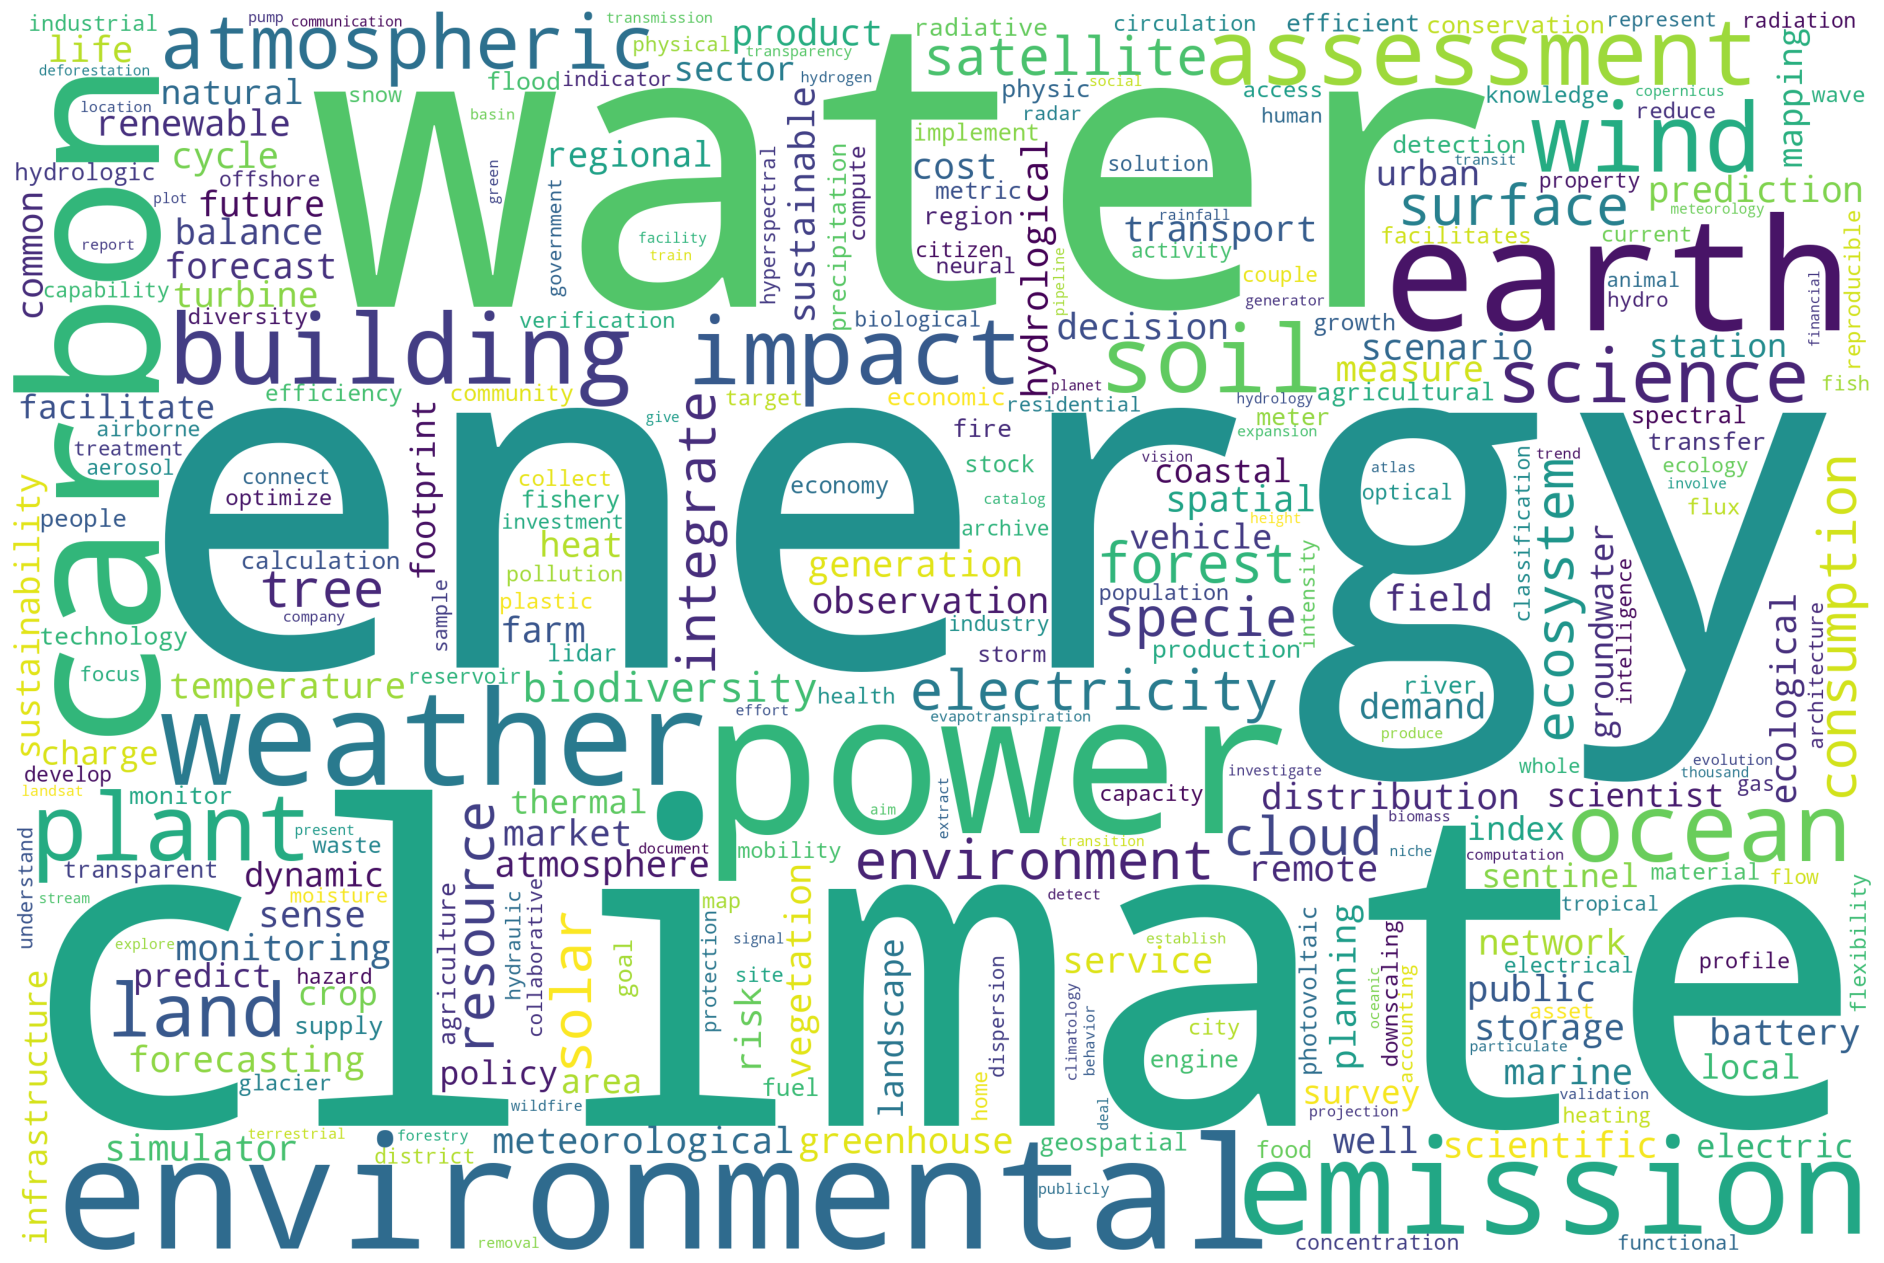

In [26]:
wc = WordCloud(background_color="white", max_words=300,width=3000,height=2000,relative_scaling=0.2)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

In [27]:
df['cleaned_text'].str.split()

0                                        [weather, radar]
1                              [water, beneficial, reuse]
2       [tackling, diverse, environmental, prediction,...
3       [transition, climate, vulnerability, assessmen...
4       [field, campaign, interplay, clouds, convectio...
                              ...                        
1969                          [agricultural, extensively]
1970                     [hyperspetral, coastal, regions]
1971    [efficient, construction, execution, scientifi...
1972    [sustainable, infrastructure, sustainability, ...
1973                     [environmental, remote, servers]
Name: cleaned_text, Length: 1974, dtype: object

In [28]:
df['cleaned_text_bigrams'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_small)) # Remove words from blacklist
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [29]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text_bigrams'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [30]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame()

In [31]:
type(bigrams)

pandas.core.frame.DataFrame

In [32]:
bigrams.head(300)

,count
"(time, series)",35
"(climate, change)",34
"(machine, learning)",30
"(energy, systems)",30
"(real, time)",25
"(power, system)",25
"(earth, system)",25
"(energy, system)",23
"(energy, consumption)",20
"(deep, learning)",19


In [33]:
# This are the bigrams manually filtered to match to the OpenSustain.tech database
bigrams_ost = ["climate change","energy systems","power system","earth system","energy system","energy consumption","power systems","remote sensing","renewable energy","water quality","life cycle","radiative transfer","weather climate","integrated assessment","wind energy","earth science","carbon footprint","surface water","sustainable development","species distriibution","power plants","wind turbine", "electric vehicle","wind farm","carbon emiśsions","greenhouse emissions","greenhouse gases","electricity market","land surface","numerical weather","wind turbine", "energy storage","development goals","solar cells", "soil water", "energy resources", "solar energy","energy managment", "carbon intensity", "water balance", "soil moisture", "climate science", "environmental impacts", "climate models", "carbon cycle", "offshore wind", "energy sector", "energy information", "distributed energy", "impact climate", "weather prediction", "urban energy", "power consumption", "citizen science", "decision making", "atmospheric science", "water resources", "land cover", "circular economy", "biodivercity information", "global climate", "forest management", "hydrological models", "large eddy", "energy market", "forest carbon", "atmospheric oceanic", "solar radiation", "stock assessment","general circulation", "battery models", "weather forecasts", "climate scenarios", "environmental economic", "climate policy", "climate analysis", "climate carbon", "electricity generation", "energy policy", "power grid", "electricity system", "fisheries stock", "global weather", "cloud microphysics","storage systems","wind speed", "wind farms","public transport","solar thermal", "statisical downscaling", "future energy", "energy modeling", "energy generation", "environment climate","tree crown","climate downscaling","solar power","wildland fire","climate sciences","fossil fuel","global scale","impact assessment","energy resource","carbon dioxide","carbon nitrogen","ocean state","emissions energy","soil properties","shallow water","smart grid","water treatment","future climate","climate impacts","level rise","global soil","niche models","land use","costal ocean","heating cooling", "ecological niche", "energy usage", "weather radar","water flow","wave energy","heat pump","district heating","flood inundation","protected areas","smart meter","demand flexibility"," groundwater surface","bottom trawl","tropical cyclone","water management","water carbon","organic carbon","atmospheric composition","marine debris","fire spread","electrial grid","social environmental","atmospheric models","global change","plastic pollution","change analysis"]


In [34]:
bigrams_ost

['climate change',
 'energy systems',
 'power system',
 'earth system',
 'energy system',
 'energy consumption',
 'power systems',
 'remote sensing',
 'renewable energy',
 'water quality',
 'life cycle',
 'radiative transfer',
 'weather climate',
 'integrated assessment',
 'wind energy',
 'earth science',
 'carbon footprint',
 'surface water',
 'sustainable development',
 'species distriibution',
 'power plants',
 'wind turbine',
 'electric vehicle',
 'wind farm',
 'carbon emiśsions',
 'greenhouse emissions',
 'greenhouse gases',
 'electricity market',
 'land surface',
 'numerical weather',
 'wind turbine',
 'energy storage',
 'development goals',
 'solar cells',
 'soil water',
 'energy resources',
 'solar energy',
 'energy managment',
 'carbon intensity',
 'water balance',
 'soil moisture',
 'climate science',
 'environmental impacts',
 'climate models',
 'carbon cycle',
 'offshore wind',
 'energy sector',
 'energy information',
 'distributed energy',
 'impact climate',
 'weather pred

In [35]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

(life, cycle, assessment)                 9
(google, earth, engine)                   8
(sustainable, development, goals)         7
(species, distribution, models)           7
(earth, system, models)                   5
(numerical, weather, prediction)          5
(energy, systems, modeling)               4
(global, biodiversity, information)       4
(biodiversity, information, facility)     4
(large, eddy, simulation)                 4
(curated, list, awesome)                  4
(climate, change, canada)                 4
(energy, information, administration)     4
(machine, learning, models)               4
(environment, climate, change)            4
(domain, specific, language)              3
(provides, easy, access)                  3
(network, common, form)                   3
(common, form, netcdf)                    3
(unidata, network, common)                3
(interface, world, database)              3
(scientific, access, freely)              3
(extended, input, output)       

In [36]:
!wget https://raw.githubusercontent.com/sadielbartholomew/cf-standard-names-linguistics/master/data/all_cf_standard_names_for_table_v83_at_30_11_23.txt

--2024-06-12 10:15:35--  https://raw.githubusercontent.com/sadielbartholomew/cf-standard-names-linguistics/master/data/all_cf_standard_names_for_table_v83_at_30_11_23.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248624 (243K) [text/plain]
Saving to: ‘all_cf_standard_names_for_table_v83_at_30_11_23.txt’

all_cf_standard_nam 100%[===================>] 242.80K  --.-KB/s    in 0.03s   

2024-06-12 10:15:36 (6.81 MB/s) - ‘all_cf_standard_names_for_table_v83_at_30_11_23.txt’ saved [248624/248624]



In [47]:
cf_file = open("all_cf_standard_names_for_table_v83_at_30_11_23.txt", "r")
cf_meta_data = cf_file.read().split("\n")
df_cf_meta = pd.DataFrame(cf_meta_data,columns =['description'])

In [48]:
df_cf_meta

,description
0,acoustic area backscattering strength in sea w...
1,acoustic signal roundtrip travel time in sea w...
2,acoustic target strength in sea water
3,acoustic volume backscattering strength in sea...
4,aerodynamic particle diameter
...,...
4663,y heat flux in sea water due to advection
4664,y wind
4665,y wind gust
4666,zenith angle


In [49]:
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [50]:
# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df_cf_meta['description']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [51]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq


[('mass', 1241),
 ('content', 1157),
 ('concentration', 1145),
 ('radioactivity', 1089),
 ('atmosphere', 943),
 ('tendency', 866),
 ('surface', 786),
 ('water', 729),
 ('mole', 642),
 ('fraction', 409),
 ('integral', 385),
 ('flux', 361),
 ('emission', 352),
 ('carbon', 324),
 ('express', 324),
 ('particle', 291),
 ('aerosol', 281),
 ('nitrogen', 191),
 ('cloud', 176),
 ('ocean', 154),
 ('temperature', 144),
 ('deposition', 135),
 ('upward', 111),
 ('wave', 109),
 ('dioxide', 106),
 ('organic', 103),
 ('velocity', 102),
 ('transport', 99),
 ('soil', 98),
 ('downward', 96),
 ('land', 96),
 ('northward', 94),
 ('particulate', 92),
 ('matter', 86),
 ('heat', 86),
 ('wind', 86),
 ('energy', 83),
 ('stratiform', 82),
 ('production', 81),
 ('amount', 80),
 ('acid', 79),
 ('thickness', 76),
 ('eastward', 75),
 ('fire', 74),
 ('ambient', 73),
 ('monoxide', 72),
 ('downwelling', 70),
 ('liquid', 66),
 ('advection', 66),
 ('shortwave', 65),
 ('height', 63),
 ('pressure', 60),
 ('convective', 57)

In [54]:
words_cf_meta = list(df_cf_meta['description'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [55]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words_cf_meta, 2)).value_counts()).to_frame()

In [56]:
bigrams.head(300)

,count
"(radioactivity, concentration)",726
"(mass, content)",663
"(atmosphere, mass)",614
"(tendency, atmosphere)",583
"(content, surface)",367
"(integral, radioactivity)",363
"(radioactivity, content)",363
"(concentration, integral)",363
"(surface, radioactivity)",363
"(concentration, radioactivity)",362
